<a href="https://colab.research.google.com/github/SamuelSousaFerreira/Mercado-Financeiro/blob/main/An%C3%A1lise_de_A%C3%A7%C3%B5es_com_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [6]:
pip install yfinance #instalando

     |████████████████████████████████| 5.5MB 9.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=981140c2c7aa72509b9972628263901ae456810bc74f64c98837506774e0a812
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [7]:
import yfinance as yf

# **1 - Aquisição dos Dados das Ações**

In [16]:
ticker = yf.Ticker('^BVSP')
#df = ticker.history(period="3y", interval ="1mo")
df = ticker.history(interval='1d', start='2018-01-01', end='2021-04-25')

In [18]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-16,120701.0,121333.0,120199.0,121114.0,7945600,0,0
2021-04-19,121116.0,121974.0,120682.0,120934.0,10028100,0,0
2021-04-20,120925.0,121354.0,119841.0,120062.0,7811500,0,0
2021-04-22,120064.0,120995.0,119203.0,119371.0,8598600,0,0
2021-04-23,119372.0,120815.0,119372.0,120530.0,7615500,0,0


# **2 - Decomposição de uma série temporal**

In [19]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2018-01-02 to 2021-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   813 non-null    float64
dtypes: float64(1)
memory usage: 12.7 KB


In [20]:
df[['Close']].head()

,Close
Date,
2018-01-02,77891.0
2018-01-03,77995.0
2018-01-04,78647.0
2018-01-05,79071.0
2018-01-08,79379.0


In [32]:
decomposicao = seasonal_decompose(df.Close, model='additive', freq=30,
                                  extrapolate_trend=30)

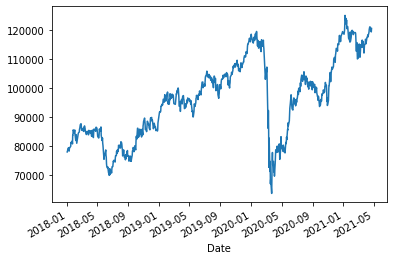

In [33]:
df.Close.plot()

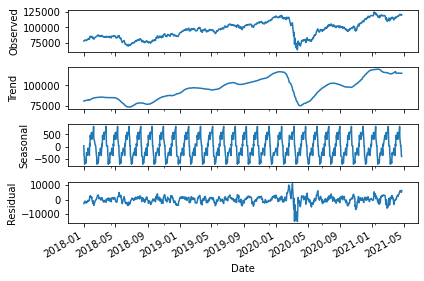

In [31]:
decomposicao.plot(); #ponto e vírgula é para não fazer os gráficos 2 vezes

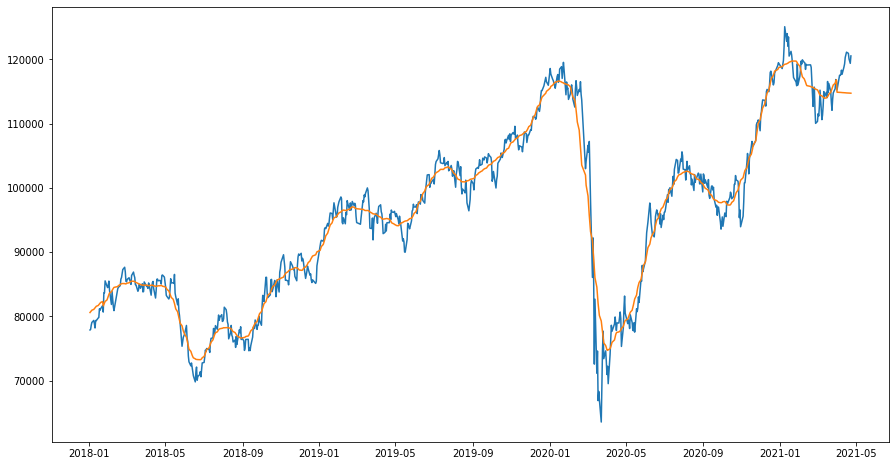

In [36]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

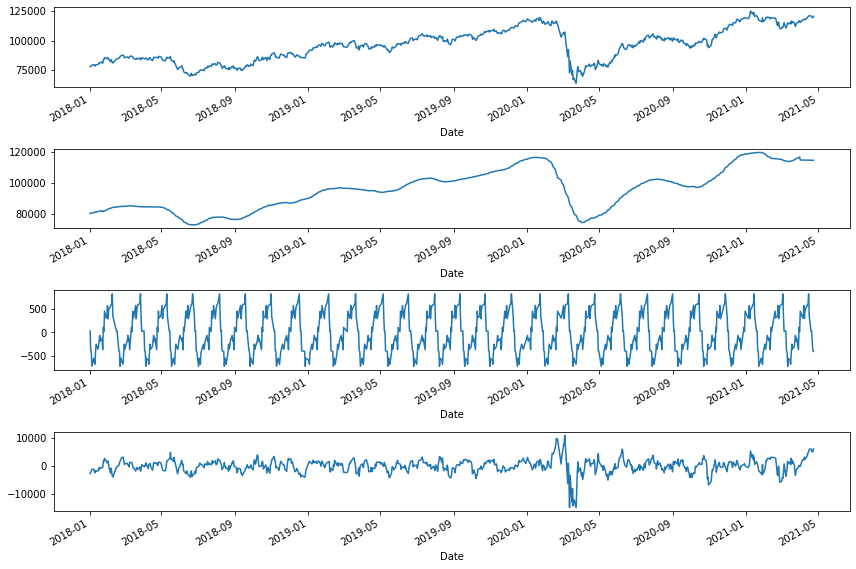

In [38]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4,1, figsize=(12,8))

decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax= ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout() #ajusta o layout

# **3 -  Cálculo da Média Móvel**

In [39]:
df['Close'].head()

Date
2018-01-02    77891.0
2018-01-03    77995.0
2018-01-04    78647.0
2018-01-05    79071.0
2018-01-08    79379.0
Name: Close, dtype: float64

In [41]:
df.Close.rolling(7).mean()

Date
2018-01-02              NaN
2018-01-03              NaN
2018-01-04              NaN
2018-01-05              NaN
2018-01-08              NaN
                  ...      
2021-04-16    119457.428571
2021-04-19    119831.857143
2021-04-20    120173.571429
2021-04-22    120253.428571
2021-04-23    120429.571429
Name: Close, Length: 813, dtype: float64

In [44]:
media_movel_7d = df.Close.rolling(7).mean()
media_movel_14d = df.Close.rolling(14).mean()
media_movel_21d = df.Close.rolling(21).mean()
media_movel_30d = df.Close.rolling(30).mean()

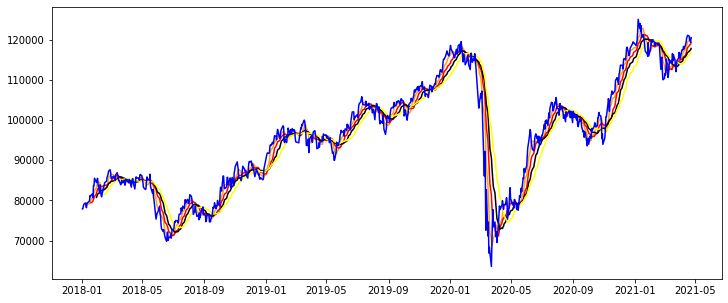

In [47]:
fig, ax= plt.subplots(figsize=(12,5))
plt.plot(media_movel_7d,'orange')
plt.plot(media_movel_14d,'red')
plt.plot(media_movel_21d,'black')
plt.plot(media_movel_30d,'yellow')
plt.plot(df.Close, 'blue')

# **4 - Extração das features**

In [52]:
df = df.reset_index()

In [56]:
# criando feature ara cada período
df['year']= df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day

In [57]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8


In [59]:
#Rentabilidade = (preço atual/ preço anterior)*100 -100
df[['Close']].head()

,Close
0,77891.0
1,77995.0
2,78647.0
3,79071.0
4,79379.0


In [60]:
df[['Close']].shift() #empurra o vetor x casas para frente ou para trás

,Close
0,NaN
1,77891.0
2,77995.0
3,78647.0
4,79071.0
...,...
808,120701.0
809,121114.0
810,120934.0
811,120062.0


In [61]:
df['rentabilidade'] = df['Close']/ df.Close.shift() *100 -100

In [63]:
df.rentabilidade.head()

0         NaN
1    0.133520
2    0.835951
3    0.539118
4    0.389523
Name: rentabilidade, dtype: float64

In [65]:
def feature_extraction(df_):
  df_['year'] = df_['Date'].dt.year
  df_['month'] = df_.Date.dt.month
  df_['day'] = df_.Date.dt.day
  df_['rentabilidade'] = df_['Close']/ df_.Close.shift() *100 -100

In [66]:
feature_extraction(df)

In [67]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2,NaN
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3,0.133520
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4,0.835951
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5,0.539118
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8,0.389523


## **Hipótese 1 - Existe um mês melhor para investir no ativo**

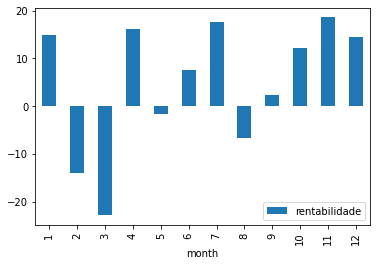

In [72]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind="bar")

Esses dados tem ruídos. Teria que tratar os dados.
De acordo com os dados o mês 3 é o melhor para investir e o pior é o 11.


In [73]:
df.set_index('Date', inplace=True)

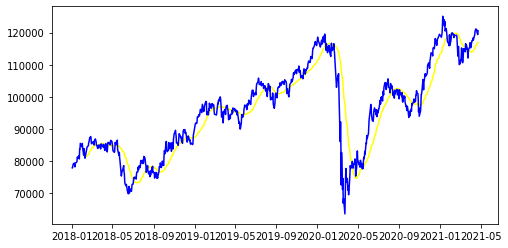

In [75]:
media_movel_30d = df.Close.rolling(30).mean()
media_movel_90d = df.Close.rolling(90).mean()
fig, ax= plt.subplots(figsize=(8,4))
#plt.plot(media_movel_90d,'black')
plt.plot(media_movel_30d,'yellow')
plt.plot(df.Close, 'blue')

## **Hipótese 2 - Existe melhor dia para investir em um ativo**

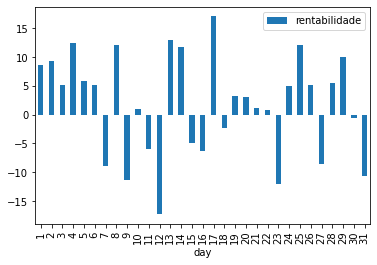

In [76]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind="bar")

Visualmente os dias bons para compra são 7,9,12,23 ...
e os piore são 4,17,8...

# **5 - Correlação de Séries Temporais**

In [85]:
tickers = ['VALE3.SA','ITUB4.SA','PETR4.SA','ABEV3.SA','BBDC4.SA','^BVSP','USDBRL=X']

In [86]:
dfs=[]

for t in tickers:
  print('Reading ticker {}...'.format(t))
  ticker = yf.Ticker(t)
  aux = ticker.history(interval='1d', start='2018-01-01',end='2021-04-25')
  aux.reset_index(inplace=True)
  aux['ticket'] = t
  dfs.append(aux)


Reading ticker VALE3.SA...
Reading ticker ITUB4.SA...
Reading ticker PETR4.SA...
Reading ticker ABEV3.SA...
Reading ticker BBDC4.SA...
Reading ticker ^BVSP...
Reading ticker USDBRL=X...


In [87]:
dfs[1]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket
0,2018-01-02,24.642231,25.264044,24.642231,25.264044,16650900,0.01,0.0,ITUB4.SA
1,2018-01-03,25.275564,25.528896,25.085565,25.436775,22295700,0.00,0.0,ITUB4.SA
2,2018-01-04,25.477081,26.081623,25.477081,25.966471,23222550,0.00,0.0,ITUB4.SA
3,2018-01-05,25.977993,26.093144,25.678602,26.041327,15717450,0.00,0.0,ITUB4.SA
4,2018-01-08,25.943442,26.093137,25.782229,25.954956,12708150,0.00,0.0,ITUB4.SA
...,...,...,...,...,...,...,...,...,...
808,2021-04-16,27.490000,28.100000,27.490000,27.950001,20136000,0.00,0.0,ITUB4.SA
809,2021-04-19,27.879999,27.959999,27.450001,27.530001,26973900,0.00,0.0,ITUB4.SA
810,2021-04-20,27.410000,27.780001,27.270000,27.389999,19792500,0.00,0.0,ITUB4.SA
811,2021-04-22,27.530001,27.719999,27.230000,27.400000,24220800,0.00,0.0,ITUB4.SA


In [90]:
#Calcula a extração de dados para cada tipo de ação
for d in dfs:
  feature_extraction(d)

In [89]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,rentabilidade
0,2018-01-02,34.776320,35.894255,34.776320,35.877056,14156500,0.0,0,VALE3.SA,2018,1,2,NaN
1,2018-01-03,35.971657,36.014654,35.515882,35.662075,12744200,0.0,0,VALE3.SA,2018,1,3,-0.599216
2,2018-01-04,35.954455,36.436024,35.705069,35.808262,18433000,0.0,0,VALE3.SA,2018,1,4,0.409922
3,2018-01-05,35.748069,36.367233,35.524484,36.367233,15251300,0.0,0,VALE3.SA,2018,1,5,1.561012
4,2018-01-08,36.461827,37.175583,36.461827,37.175583,14542800,0.0,0,VALE3.SA,2018,1,8,2.222742
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2021-04-16,108.639999,109.110001,107.500000,108.669998,17401500,0.0,0,VALE3.SA,2021,4,16,0.425099
809,2021-04-19,109.000000,109.879997,107.639999,107.730003,23297500,0.0,0,VALE3.SA,2021,4,19,-0.864999
810,2021-04-20,107.949997,108.349998,105.019997,106.160004,20895800,0.0,0,VALE3.SA,2021,4,20,-1.457347
811,2021-04-22,107.239998,107.239998,104.339996,106.230003,19799100,0.0,0,VALE3.SA,2021,4,22,0.065938


In [94]:
correlacao = pd.DataFrame()

for d in dfs:
  correlacao[d['ticket'].iloc[0]] =d['rentabilidade']

correlacao


,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.599216,0.683704,0.906358,0.230509,0.459715,0.133520,0.102796
2,0.409922,2.082400,0.179610,-0.551957,1.640803,0.835951,-1.606765
3,1.561012,0.288279,0.597744,0.370011,0.566396,0.539118,-0.684511
4,2.222742,-0.331667,1.188365,-0.184328,-0.028151,0.389523,-0.074182
...,...,...,...,...,...,...,...
808,0.425099,1.121568,-0.606320,-0.441082,1.176465,0.342168,0.904323
809,-0.864999,-1.502684,5.795206,-0.443042,0.000000,-0.148620,0.374005
810,-1.457347,-0.508541,-1.894567,-0.699299,1.162794,-0.721054,3.253363
811,0.065938,0.036511,-0.461799,1.792572,-0.452101,-0.575536,-1.244342


In [95]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.406899,0.502180,0.295346,-0.073210,0.649438,0.016753
ITUB4.SA,0.406899,1.000000,0.612963,0.534159,0.122278,0.816632,-0.067929
PETR4.SA,0.502180,0.612963,1.000000,0.440098,0.052429,0.804993,-0.004380
ABEV3.SA,0.295346,0.534159,0.440098,1.000000,0.005710,0.628601,-0.022595
BBDC4.SA,-0.073210,0.122278,0.052429,0.005710,1.000000,0.046692,-0.008555
^BVSP,0.649438,0.816632,0.804993,0.628601,0.046692,1.000000,-0.015744
USDBRL=X,0.016753,-0.067929,-0.004380,-0.022595,-0.008555,-0.015744,1.000000


## **Visualização usando o seaborn**

In [96]:
import seaborn as sns

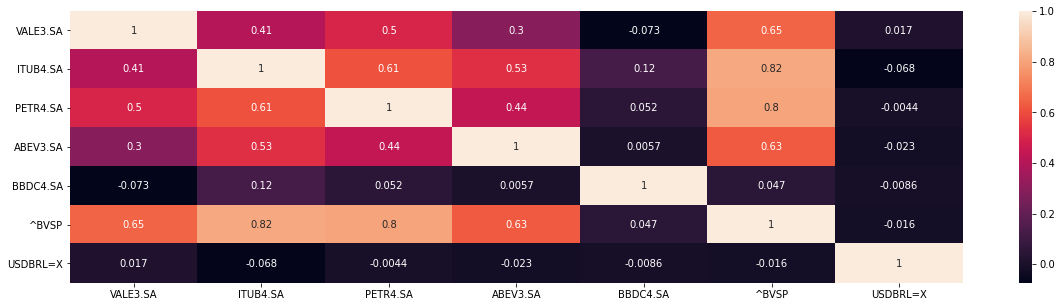

In [98]:
fig, ax= plt.subplots(figsize=(20,5))
sns.heatmap(correlacao.corr(), annot=True)

## **Visualização de dados usando Plotly**

In [99]:
import plotly.graph_objs as go

In [100]:
def plot_lines(df_, columns=['Open', 'Close','High','Low']):

  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x=list(df_.index),
                             y = df_[c],
                             mode = 'markers+lines',
                             name=c))
  return fig

In [101]:
plot_lines(df)

In [103]:
def plotCandlesStick(df, acao='ticker'):
  tracel ={
      'x':df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }

  data= [tracel]
  layout = go.Layout()

  fig = go.Figure(data=data, layout=layout)
  return fig

In [104]:
plotCandlesStick(df)

## **Testar Hipóteses para verificar se a série é ou não estacionária**
## **Fazer previsão usando autoregressive integratedmoving average-ARIMA ou deep learnig model(LSTM)**
## **Integrar mais dados e analisar a correlação da rentabilidade**
## **Explorar as visualizações com as bibliotecas**